In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

df = pd.read_excel('Bank failure data.xlsx')


#Question1 :
#Ans: Citibank (South Dakota)

df_2009 = df[df['Quarter'] ==  '2009Q4']
#largest bank based on 2009q4
print(df_2009.loc[df_2009['Size'].idxmax()])

Bank Name                         Citibank (South Dakota), N.A.
Quarter                                                  2009Q4
Tier One                                                  12.78
Texas                                                      0.15
Size                                                    99.7772
Brokered Deposits                                         95.78
Net Chargeoffs                                             5.66
Constr and Land Dev Loans                                     0
Change in Portfolio Mix                                   25.28
NP CRE to Assets                                              0
Volatile Liabilities to Assets                            18.37
Securities                                               107.54
Failed during 2010Q2                                         No
Cert Number                                               23360
Name: 2618, dtype: object


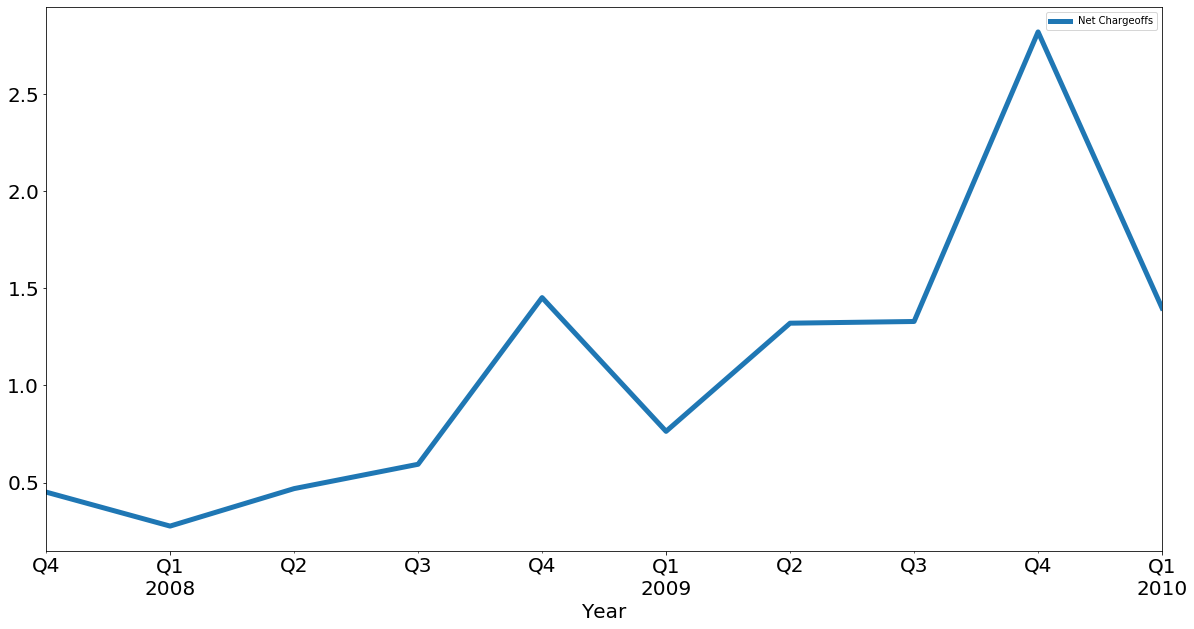

In [2]:

#There are two peaks in an upward treand followed by a steep fall in 2009Q4 as can be seen from the graph below

df_time = df.copy()
df_time.Quarter = pd.to_datetime(df_time.Quarter)
df_time.set_index('Quarter', inplace=True)
df_plot = df_time[['Net Chargeoffs']]
df_plot.groupby('Quarter').mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);


,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2,Cert Number
Tier One,1.00,-0.16,-0.29,-0.15,-0.10,-0.19,-0.01,-0.16,-0.27,0.07,-0.15,0.04
Texas,-0.16,1.00,0.17,0.19,0.47,0.25,-0.01,0.42,0.16,-0.12,0.44,0.05
Size,-0.29,0.17,1.00,0.37,0.13,0.32,-0.12,0.16,0.23,-0.14,0.19,-0.01
Brokered Deposits,-0.15,0.19,0.37,1.00,0.18,0.31,0.06,0.23,0.27,-0.11,0.36,0.22
Net Chargeoffs,-0.10,0.47,0.13,0.18,1.00,0.17,0.05,0.25,0.14,-0.04,0.27,0.07
Constr and Land Dev Loans,-0.19,0.25,0.32,0.31,0.17,1.00,0.07,0.17,0.27,-0.13,0.44,0.27
Change in Portfolio Mix,-0.01,-0.01,-0.12,0.06,0.05,0.07,1.00,-0.04,0.10,-0.01,0.01,0.19
NP CRE to Assets,-0.16,0.42,0.16,0.23,0.25,0.17,-0.04,1.00,0.17,-0.05,0.40,0.11
Volatile Liabilities to Assets,-0.27,0.16,0.23,0.27,0.14,0.27,0.10,0.17,1.00,-0.10,0.20,0.30
Securities,0.07,-0.12,-0.14,-0.11,-0.04,-0.13,-0.01,-0.05,-0.10,1.00,-0.15,-0.02


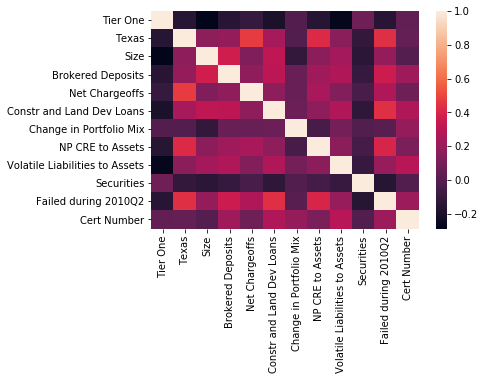

In [3]:

#the correlation matrix and heatmap below there is negative correlation of -0.15


df_corr = df.copy()

df_corr['Failed during 2010Q2'] = df_corr['Failed during 2010Q2'].map({'Yes': 1, 'No': 0})

# calculate the correlation matrix
corr = df_corr.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)


In [4]:

#Texas, Constr and Land Dev Loans  

df_model = df.copy()

df_model = df_model.fillna(df_model.mean())
df_model['Failed during 2010Q2'] = df_model['Failed during 2010Q2'].map({'Yes': 1, 'No': 0})

#Separate train and predict data
train = df_model[df_model['Quarter'] < '2010']
predict = df_model[df_model['Quarter'] >= '2010']

#Drop all string data
train_cleaned = train.drop(train.select_dtypes(['object']), axis=1)
predict_cleaned = predict.drop(predict.select_dtypes(['object']), axis=1)

#Get train and predict values 
x_train = train_cleaned.drop('Failed during 2010Q2', axis = 1).values
y_train = train_cleaned['Failed during 2010Q2'].values

x_test = predict_cleaned.drop('Failed during 2010Q2', axis = 1).values
y_test = predict_cleaned['Failed during 2010Q2'].values


kbest = SelectKBest(f_classif, k=2)
kbest.fit(x_train,y_train)
mask = kbest.get_support() 
new_features = [] 
feature = list(train_cleaned)


for bool, feature in zip(mask, feature):
    if bool:
        new_features.append(feature)

#Top two predictors        
new_features


['Texas', 'Constr and Land Dev Loans']

In [5]:

# Based on the head of the sorted dataframe based on probability of bank failing, the banks which are most likely to fail are:
#1.Butler Bank (MHC)
#2.City Bank
#3.First National Bank Rosedale Miss
#4.Bank of Florida - Southwest
#5.CF Bancorp

#Running logistic regression to predict
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
prediction = logisticRegr.predict_proba(x_test)
prediction = prediction[:,1].tolist()

#Creating a new column called Prediction in predict dataframe
predict = predict.assign(Prediction=prediction)
#Sorting values in descending order of probability of bank failing and printing the head
predict.sort_values(by=['Prediction'], ascending = False).head()


C:\machine Learning\Anaconda\envs\TensorFlow\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2,Cert Number,Prediction
2819,Butler Bank (MHC),2010Q1,-0.15,2388.81,34.752791,0.00,8.66,20.95,11.12,0.000000,35.25,92.39,1,26619,1.0
2489,City Bank,2010Q1,0.67,1683.34,49.801825,29.05,0.00,34.30,1.67,5.761712,22.44,101.34,1,21521,1.0
1729,First National Bank Rosedale Miss,2010Q1,-7.14,1571.49,19.534728,17.55,76.34,0.00,4.47,0.279575,56.56,99.38,1,15814,1.0
3409,Bank of Florida - Southwest,2010Q1,-2.98,1358.18,45.169655,11.72,14.62,14.55,0.70,7.334910,36.72,100.08,1,35106,1.0
2969,CF Bancorp,2010Q1,-6.43,1042.75,55.097040,21.56,4.46,10.20,1.12,0.841962,29.86,97.91,1,30005,1.0
